## Libraries

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [88]:
# Activate to visualize all the data
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Import data

In [89]:
df = pd.read_feather('../data/clened_houses_data.feather')

## Explore

In [90]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Columns: 167 entries, id to Área Urbana
dtypes: datetime64[ns](1), float64(6), int64(154), object(6)
memory usage: 1.3+ MB


In [91]:
df['neighbourhood'].value_counts()

neighbourhood
Engativá                                   45
Suba                                       30
Colina Campestre                           24
Fontibon                                   19
Cedritos                                   19
Usaquen                                    18
Bogotá                                     18
Modelia                                    16
Niza                                       15
Teusaquillo                                14
Kennedy Central                            12
San jose de bavaria                        12
Cerros de Suba                             11
Barrios Unidos                             11
Castilla                                   10
Chapinero                                  10
Normandia                                  10
Kennedy                                     9
Tintala                                     8
Los andes                                   8
Guaymaral                                   8
La Floresta         

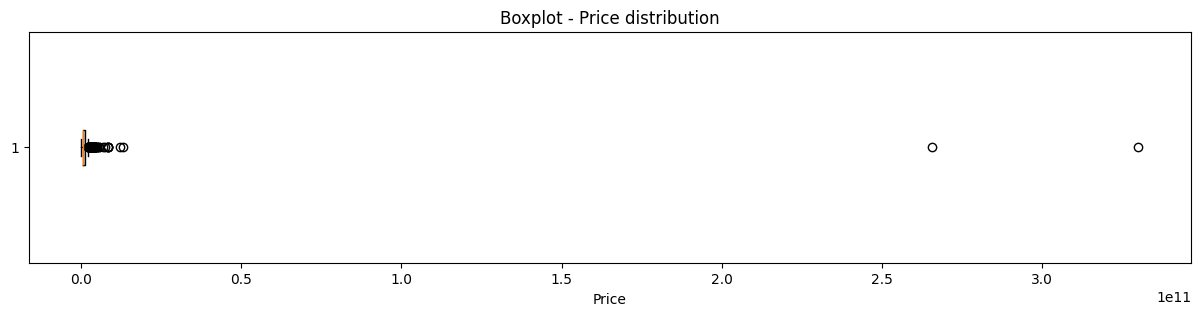

In [92]:
plt.figure(figsize=(15,3))
plt.boxplot(df['fixed_price'], vert=False)
plt.title('Boxplot - Price distribution')
plt.xlabel('Price')
plt.show()

- There are some houses that are poblably have wrong price

In [93]:
def hist_graph(data, name, xlabl, ylabl, discrt = True, xticks=None, size= (7,5)):
    height = size[1]
    aspect = size[0] / size[1]
    graph = sns.displot(data, discrete=discrt, height=height, aspect=aspect)

    ax = graph.ax
    ax.set_title(f'Histogram - {name}')
    ax.set_xlabel(xlabl)
    ax.set_ylabel(ylabl)

    if xticks is not None:
        ax.set_xticks(xticks)

    ax.grid(True)
    plt.tight_layout()
    plt.show()


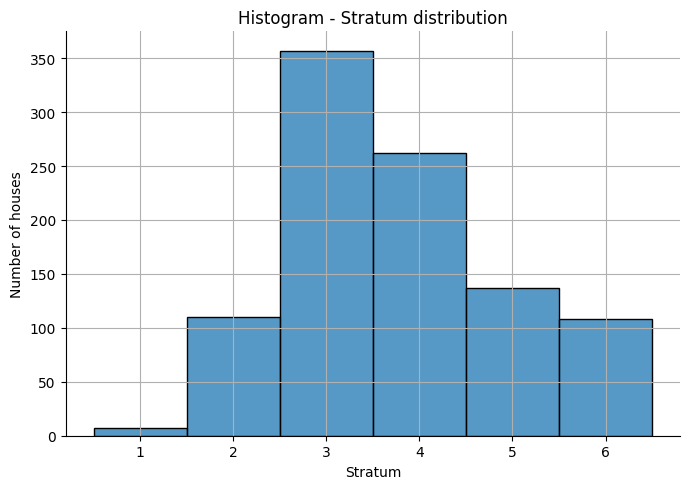

In [94]:
hist_graph(df['stratum'], 'Stratum distribution', 'Stratum', 'Number of houses')

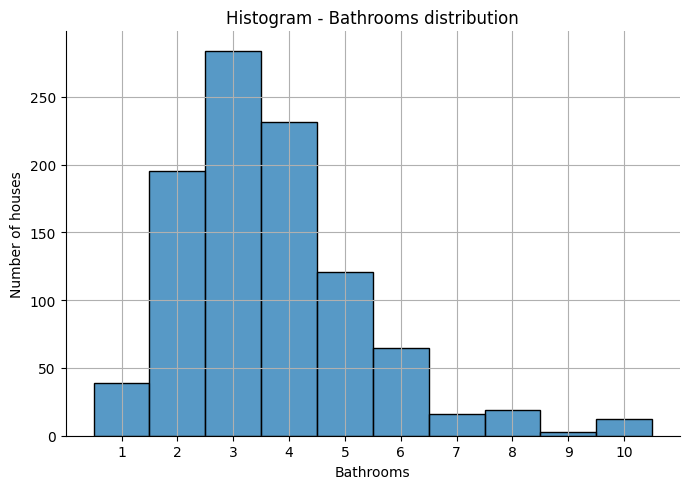

In [95]:
hist_graph(df['bathrooms'], 'Bathrooms distribution', 'Bathrooms', 'Number of houses', True, np.arange(1,11,1))

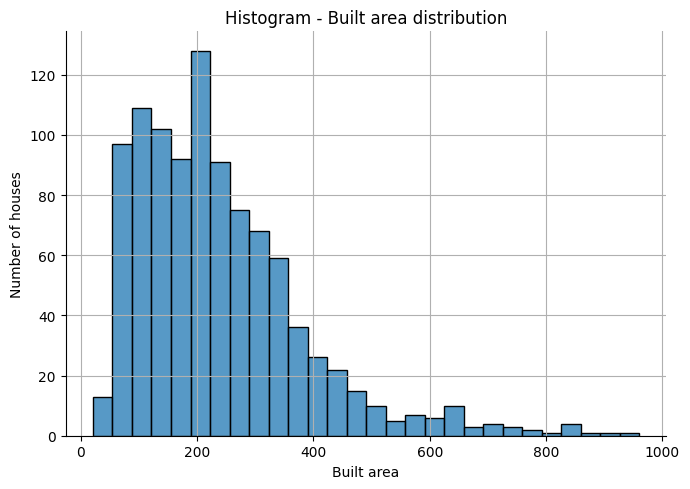

In [96]:
hist_graph(df['built_area'], 'Built area distribution', 'Built area', 'Number of houses', False)

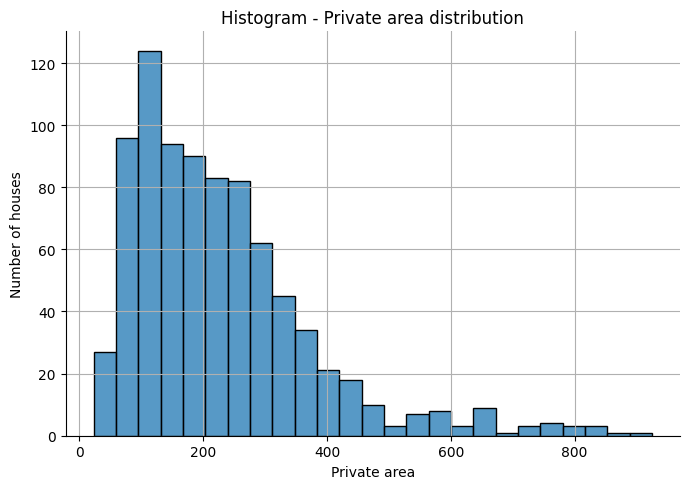

In [97]:
hist_graph(df['private_area'], 'Private area distribution', 'Private area', 'Number of houses', False)

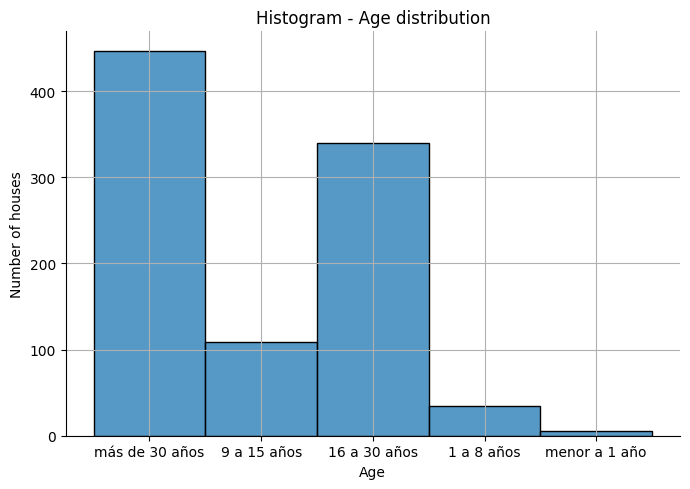

In [98]:
hist_graph(df['age'], 'Age distribution', 'Age', 'Number of houses')

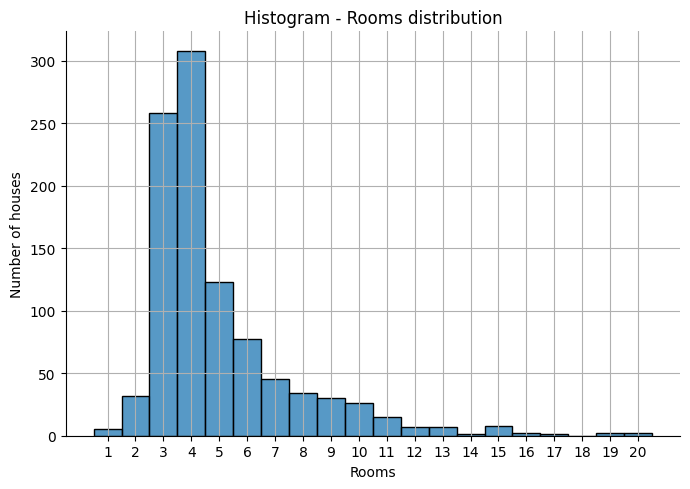

In [99]:
hist_graph(df['rooms'], 'Rooms distribution', 'Rooms', 'Number of houses', True, np.arange(1,21,1) )

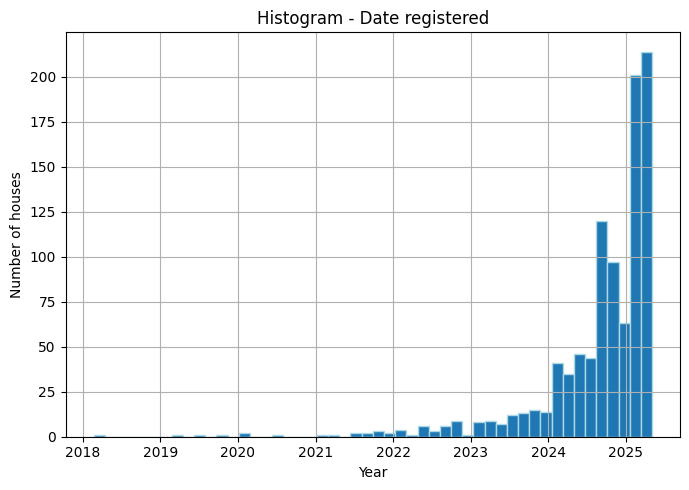

In [100]:
plt.figure(figsize=(7,5))
df['registered_date'].hist(bins=50, edgecolor='lightblue')
plt.title(f'Histogram - Date registered')
plt.xlabel('Year')
plt.ylabel('Number of houses')
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
df.query('built_area == private_area')['id'].count()

np.int64(614)

In [102]:
df['private_area'].isna().sum()

np.int64(163)

In [103]:
df['fixed_price'].sort_values(ascending=False)

173    3.300000e+11
892    2.656000e+11
160    1.300000e+10
783    1.200000e+10
157    8.500000e+09
883    8.500000e+09
180    8.500000e+09
242    8.500000e+09
388    7.500000e+09
159    6.800000e+09
661    5.700000e+09
696    5.446959e+09
258    5.000000e+09
354    5.000000e+09
428    5.000000e+09
929    4.500000e+09
163    4.500000e+09
454    4.500000e+09
478    4.490000e+09
935    4.440000e+09
889    4.400000e+09
441    4.350000e+09
235    4.350000e+09
990    4.200000e+09
335    4.200000e+09
472    4.000000e+09
40     3.975000e+09
158    3.900000e+09
289    3.870000e+09
314    3.800000e+09
510    3.800000e+09
162    3.600000e+09
56     3.550000e+09
528    3.500000e+09
294    3.500000e+09
977    3.500000e+09
416    3.400000e+09
42     3.400000e+09
186    3.300000e+09
253    3.300000e+09
264    3.300000e+09
257    3.200000e+09
394    3.200000e+09
304    3.100000e+09
797    3.000000e+09
785    3.000000e+09
184    3.000000e+09
839    3.000000e+09
147    2.950000e+09
491    2.950000e+09


In [104]:
df_t_copy = df.copy()
pd.set_option('display.max_rows', None)
# Scaling the data
df_t_copy['fixed_price'] = df_t_copy['fixed_price']/1000000
# Delete 2 outliers 
df_t_copy = df_t_copy.query('fixed_price < 100000')
# Spliting data into bins
df_t_copy['grupo'] = pd.cut(df_t_copy['fixed_price'], bins=100)
# Counting the number of examples per bin
frequency = df_t_copy['grupo'].value_counts(normalize=True).sort_index()
# Adding to create a cumulative
cumulative = frequency.cumsum() * 100
cumulative

grupo
(100.113, 241.87]         4.229607
(241.87, 370.74]         15.911380
(370.74, 499.61]         26.586103
(499.61, 628.48]         37.764350
(628.48, 757.35]         50.352467
(757.35, 886.22]         58.811682
(886.22, 1015.09]        67.472306
(1015.09, 1143.96]       71.802618
(1143.96, 1272.83]       77.844914
(1272.83, 1401.7]        82.779456
(1401.7, 1530.57]        85.297080
(1530.57, 1659.44]       86.706949
(1659.44, 1788.31]       87.210473
(1788.31, 1917.18]       88.821752
(1917.18, 2046.05]       90.533736
(2046.05, 2174.92]       91.238671
(2174.92, 2303.79]       92.346425
(2303.79, 2432.66]       92.849950
(2432.66, 2561.53]       93.756294
(2561.53, 2690.4]        94.259819
(2690.4, 2819.27]        94.561934
(2819.27, 2948.14]       95.166163
(2948.14, 3077.01]       95.770393
(3077.01, 3205.88]       96.072508
(3205.88, 3334.75]       96.374622
(3334.75, 3463.62]       96.576032
(3463.62, 3592.49]       96.978852
(3592.49, 3721.36]       97.079557
(3721.36, 3850

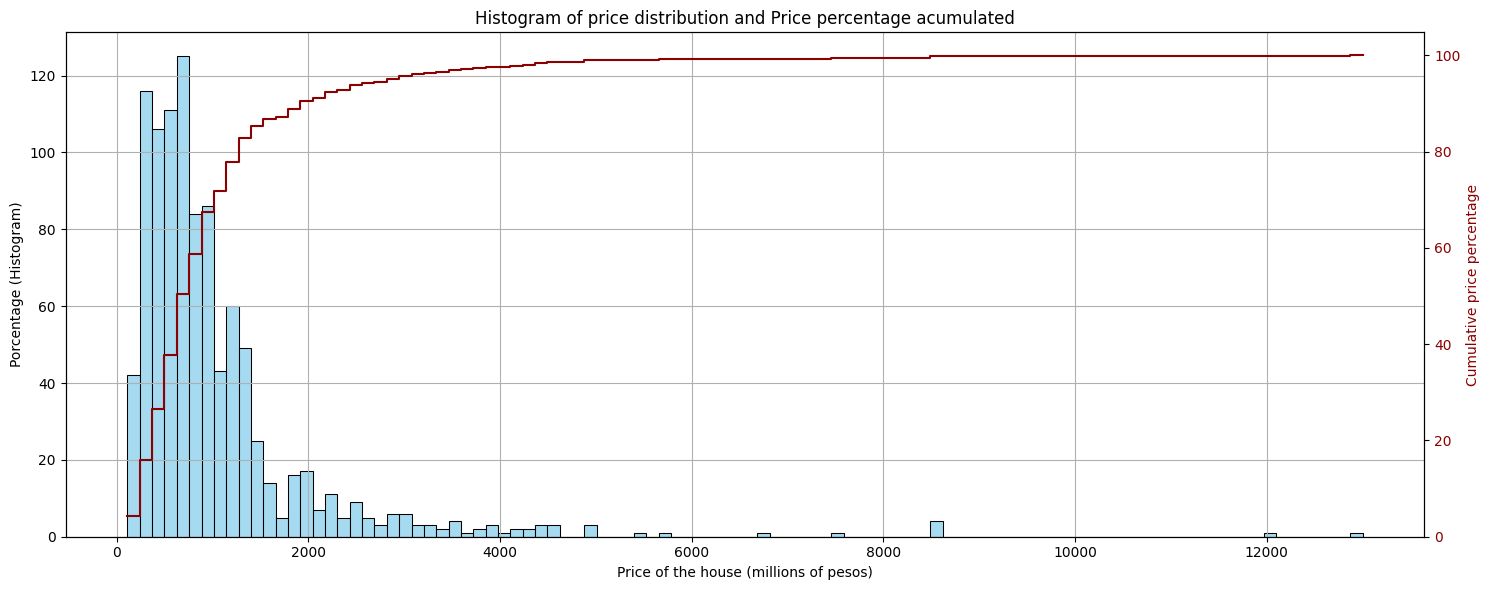

In [105]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Primer gráfico: Histograma con eje Y izquierdo
sns.histplot(df_t_copy['fixed_price'], stat='count', bins=100, edgecolor='black', ax=ax1, color='skyblue')
ax1.set_ylabel('Porcentage (Histogram)')
ax1.set_xlabel('Price of the house (millions of pesos)')
ax1.tick_params(axis='y')

# Segundo eje Y (derecho) para la línea acumulada
ax2 = ax1.twinx()
sns.histplot(df_t_copy['fixed_price'], bins=100, stat='percent', cumulative=True, fill=False, ax=ax2, color='darkred', element='step')
ax2.set_ylabel('Cumulative price percentage', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Título y diseño
plt.title('Histogram of price distribution and Price percentage acumulated')
ax1.grid(True)
plt.tight_layout()
plt.show()

- Around 99% of the houses have a price lower than 6000 millions pesos.
- Around 96% of the houses have a price lower than 3000 millions pesos.
- Around 90% of the houses have a price lower than 2000 millions pesos.
- 76% of the private area data are the same as built area or they are missing.
- Most of the properties were registered after 2024.
- The majority of the houses have 3 to 5 rooms and 2 to 4 bathrooms.
- The stratum 3 and 4 is predomiinant over the others.
- Most of the houses have more that 16 years since they were built.

## Pretratamiento de datos

In [169]:
df_copy = df.copy()

In [170]:
df.isna().sum()

id                                 0
neighbourhood                      0
fixed_price                        0
stratum                           14
type                               0
status                           877
bathrooms                         10
built_area                         4
private_area                     163
age                               58
rooms                             12
rs_agent                           0
registered_date                    8
Acceso Pavimentado                 0
Aire Acondicionado                 0
Alarma                             0
Alarma Contra Incendio             0
Alcantarillado                     0
Altura libre                       0
Altura restringida                 0
Amoblado                           0
Asador                             0
Ascensor                           0
Ascensor(es) inteligente(s)        0
Auditorio                          0
Bahias de parqueo                  0
Bahía exterior de parqueo          0
B

In [171]:
df_copy.duplicated().sum()

np.int64(0)

- No data duplicated
- But there are some missing values in several variables.

In [172]:
# Fill the null value of built_area in case private area is not null, or the contrary
def fill_built_area(data):
    if pd.isna(data['built_area']) and pd.notna(data['private_area']):
        data['built_area'] = data['private_area']
    return data
def fill_private_area(data):
    if pd.isna(data['private_area']) and pd.notna(data['built_area']):
        data['private_area'] = data['built_area']
    return data
df_copy = df_copy.apply(fill_built_area, axis=1)
df_copy = df_copy.apply(fill_private_area, axis=1)

In [173]:
# Format neighbourhoods names
def format_neighbourhoods(data):
    return data.strip().lower()
df_copy['neighbourhood'] = df_copy['neighbourhood'].apply(format_neighbourhoods)

In [174]:
# Assing stratum to those neighbourhoods that don't have it, based on the name of the neighbourhood
list_neighbourhood_stratum = df_copy.groupby(by=['neighbourhood'],as_index=False)['stratum'].max()
def filter_neighbourhoods(data):
    if pd.isna(data['stratum']):
        if data['neighbourhood'] in list_neighbourhood_stratum['neighbourhood'].values:
            data['stratum'] = float(list_neighbourhood_stratum[list_neighbourhood_stratum['neighbourhood'] == data['neighbourhood']]['stratum'].values[0])
    return data
df_copy = df_copy.apply(filter_neighbourhoods, axis=1)

In [175]:
# Keep the higher value between private_area and built_area to give a total_area of the property
df_copy['total_area'] = df_copy[['private_area', 'built_area']].max(axis=1)

C:\Users\Gamer2022\AppData\Local\Temp\ipykernel_8676\2218572875.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['total_area'] = df_copy[['private_area', 'built_area']].max(axis=1)


In [176]:
df_copy['age'] = df_copy['age'].fillna('desconocido')

In [177]:
# Delete empty rows in any of the following columns, this data is important for the model
rows_to_dropna = ['bathrooms',
                  'rooms',
                  'built_area',
                  'stratum']
df_copy = df_copy.dropna(subset=rows_to_dropna)

In [178]:
# These variables are not important for the model:
# type has only one value
# status has 880 empty rows
# private_area and built_area were condensed in one new columns
columns_to_drop = ['type', 
                   'status', 
                   'private_area', 
                   'built_area',
                   'rs_agent',
                   'registered_date'
                   ]
df_copy = df_copy.drop(columns_to_drop, axis=1)

In [179]:
dict_age = {
    'menor a 1 año' : '< 1',
    '1 a 8 años' : '1 - 8' ,
    '9 a 15 años': '9 - 15', 
    '16 a 30 años': '16 - 30', 
    'más de 30 años': '> 30', 
    'desconocido': 'ND', 
}
df_copy['age'] = df_copy['age'].map(dict_age)

In [180]:
df_copy = df_copy.reset_index(drop=True)

In [181]:
# Delete the values of the houses that were registered wrong in the platform
df_final = df_copy[df_copy['fixed_price'] <= 3000000000].copy()

In [182]:
temp_dict_age = {
    '< 1'       : 1,
    '1 - 8'     : 2,
    '9 - 15'    : 3, 
    '16 - 30'   : 4, 
    '> 30'      : 5, 
    'ND'        : 0,    
}
df_final['age'] = df_final['age'].map(temp_dict_age)

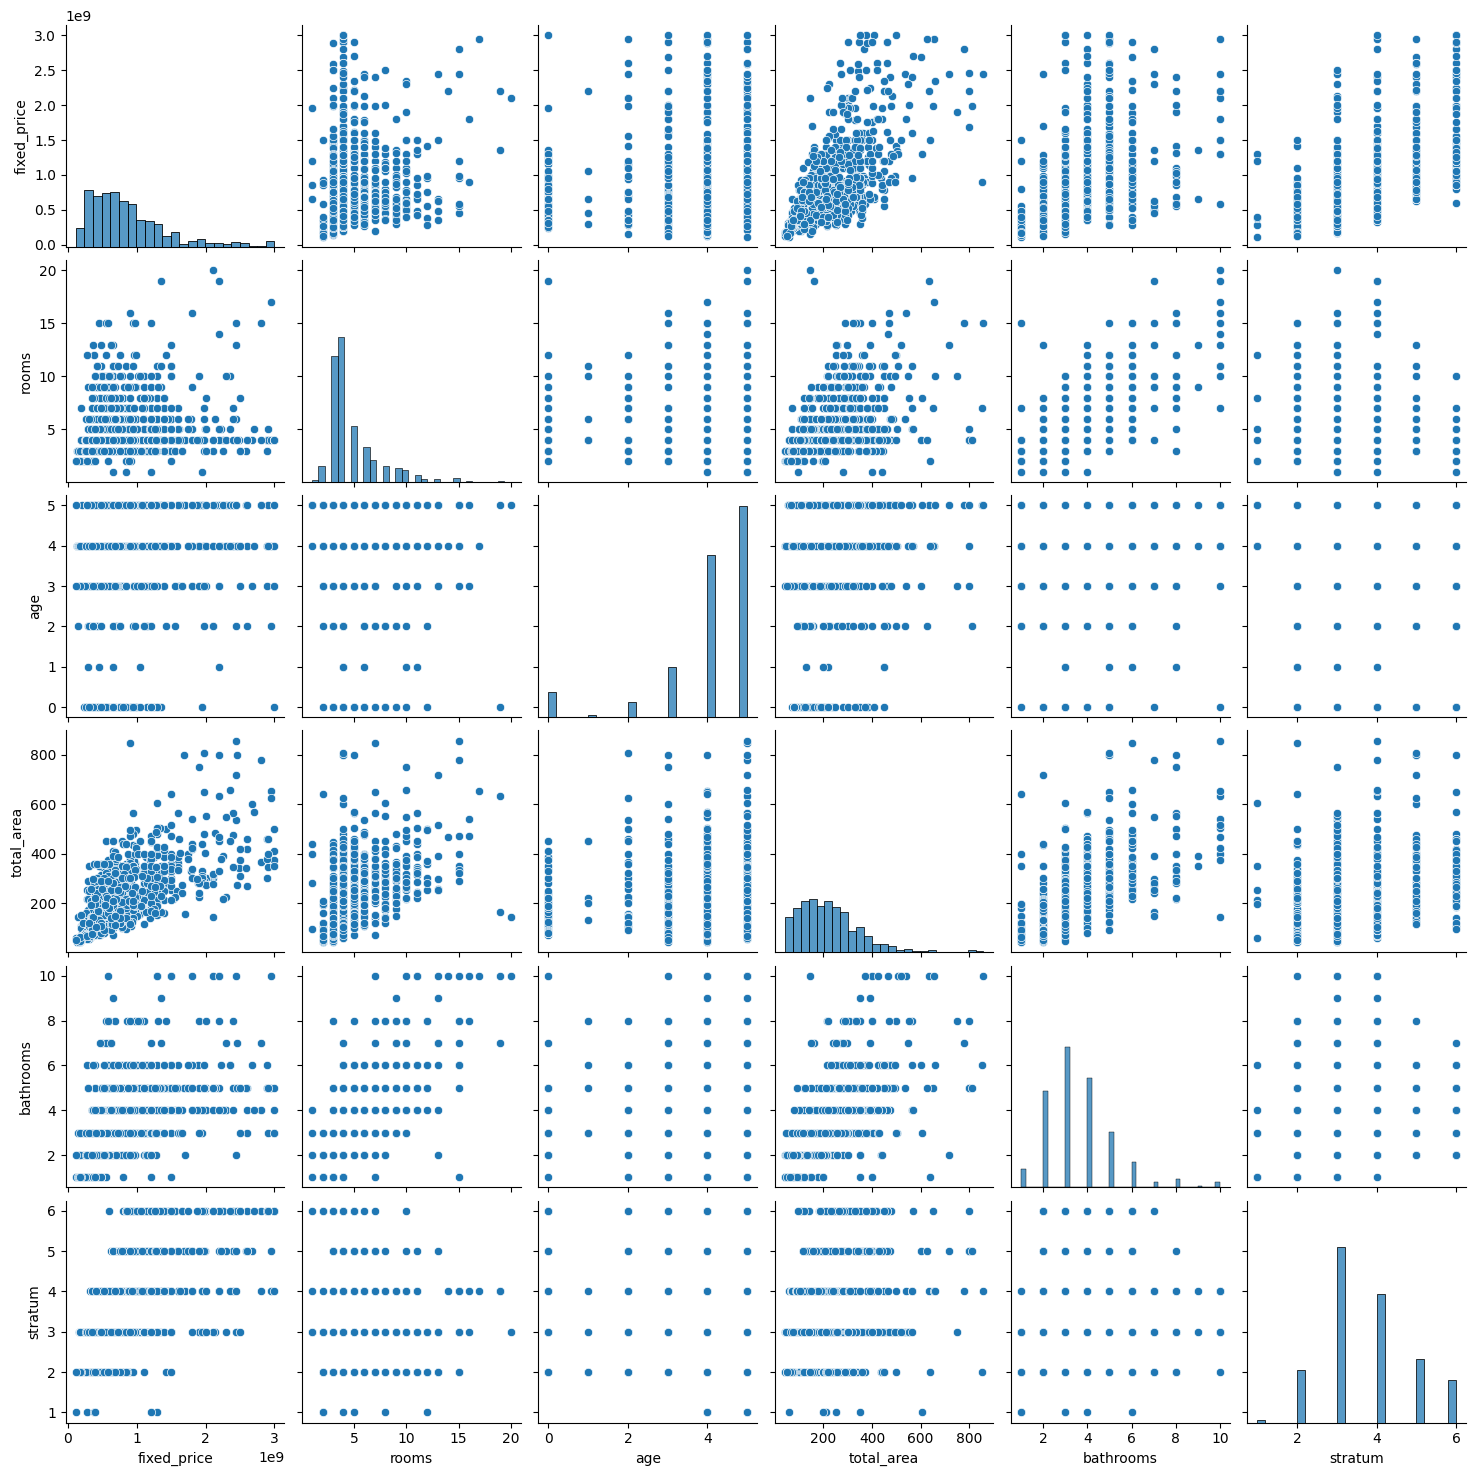

In [183]:
columns_to_pair = ['fixed_price', 'rooms','age', 'total_area', 'bathrooms', 'stratum' ]
sns.pairplot(df_final[columns_to_pair])

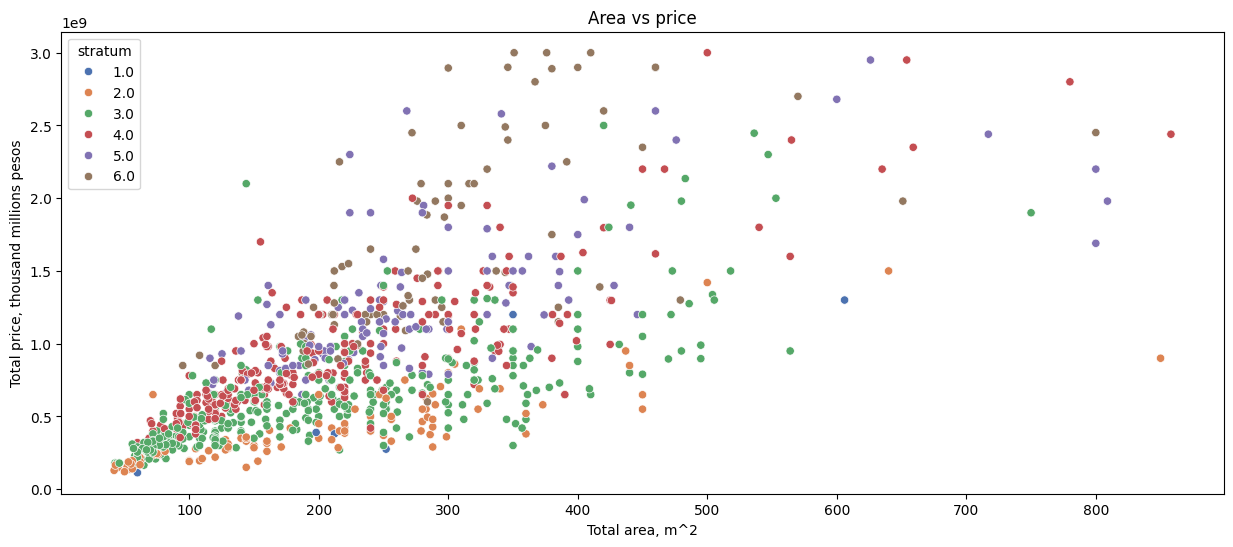

In [193]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_final,  
                x='total_area',
                y='fixed_price',
                hue='stratum',
                palette="deep"
                )
plt.xlabel('Total area, m^2')
plt.ylabel('Total price, thousand millions pesos')
plt.title('Area vs price')
plt.show()

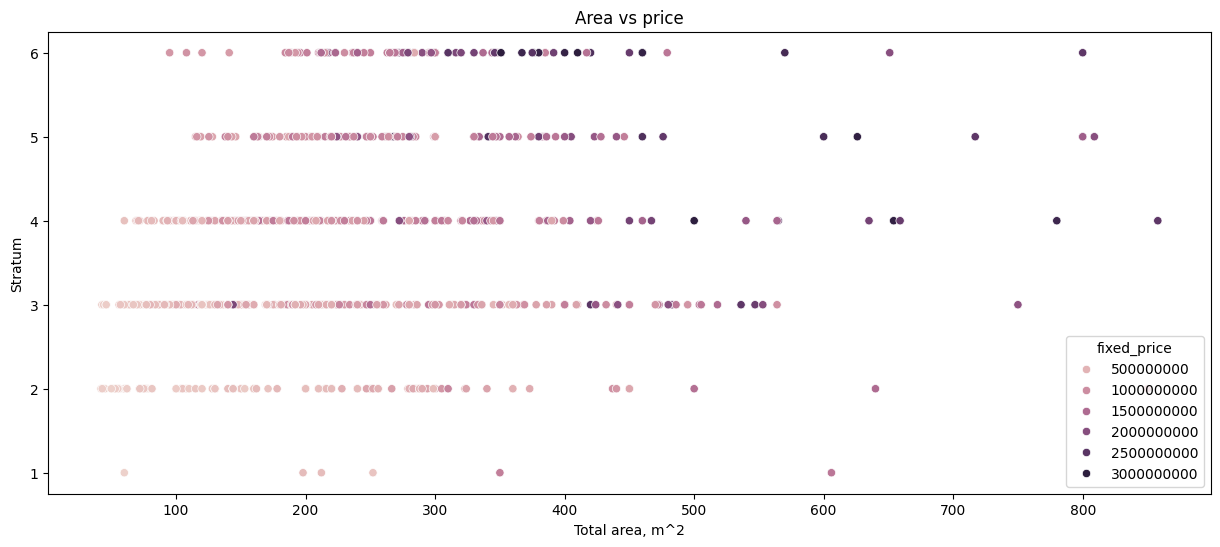

In [199]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_final,  
                x='total_area',
                y='stratum',
                hue='fixed_price', 
                )
plt.xlabel('Total area, m^2')
plt.ylabel('Stratum')
plt.title('Area vs price')
plt.show()

In [ ]:
# Export data
df_copy.to_feather("../data/preprocessed_data.feather")